In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('air_quality_dataset_lstm-1.csv')

In [53]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [55]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [56]:
df.isnull().sum()

,0
City,0
Datetime,0
PM2.5,145088
PM10,296737
NO,116632
NO2,117122
NOx,123224
NH3,272542
CO,86517
SO2,130373


In [57]:
df.duplicated().sum()

np.int64(0)

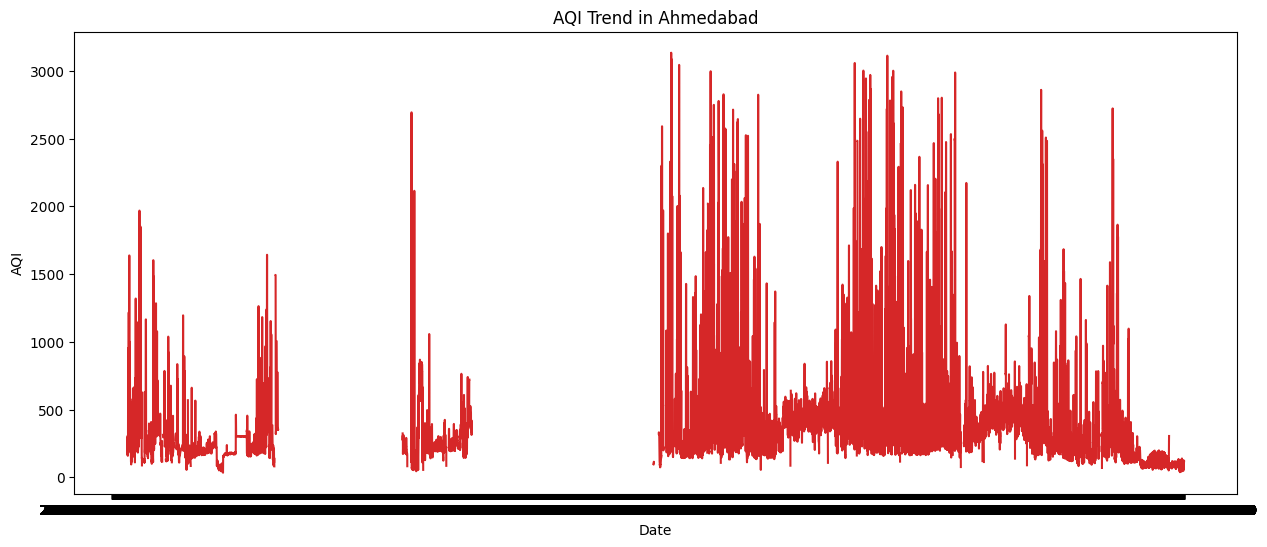

In [8]:
# 1. Visualize AQI Trend for Ahmedabad
city_name = 'Ahmedabad'
city_df = df[df['City'] == city_name].sort_values('Datetime')

plt.figure(figsize=(15, 6))
plt.plot(city_df['Datetime'], city_df['AQI'], color='tab:red')
plt.title(f'AQI Trend in {city_name}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.savefig('aqi_trend_ahmedabad.png')
plt.show()

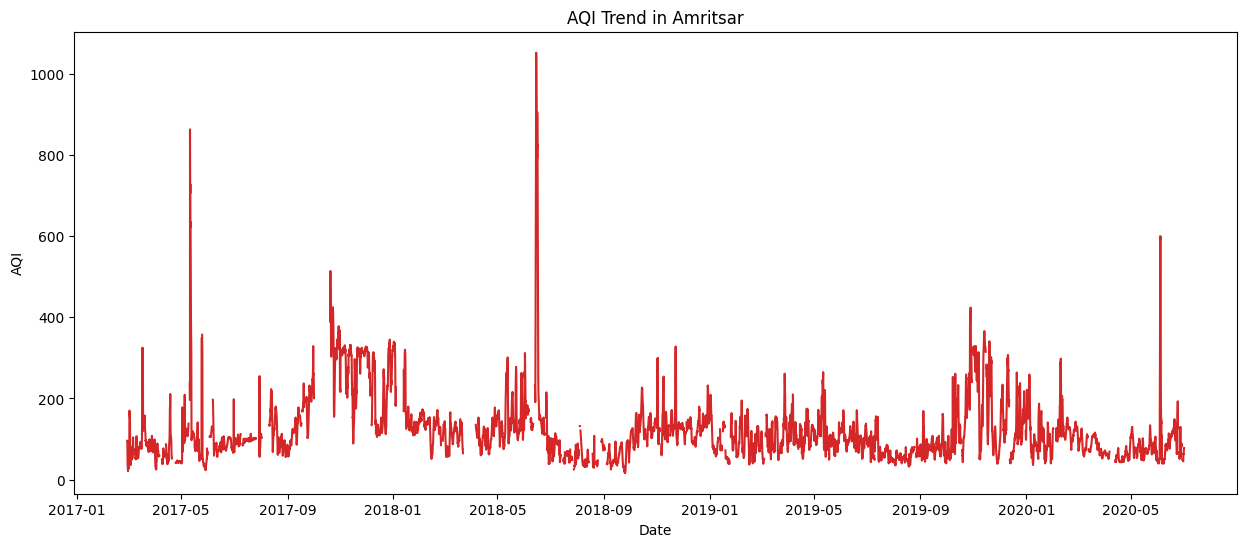

In [82]:
# 1. Visualize AQI Trend for Amritsar
city_name = 'Amritsar'
city_df = df[df['City'] == city_name].sort_values('Datetime')

plt.figure(figsize=(15, 6))
plt.plot(city_df['Datetime'], city_df['AQI'], color='tab:red')
plt.title(f'AQI Trend in {city_name}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.savefig('aqi_trend_Amritsar.png')
plt.show()

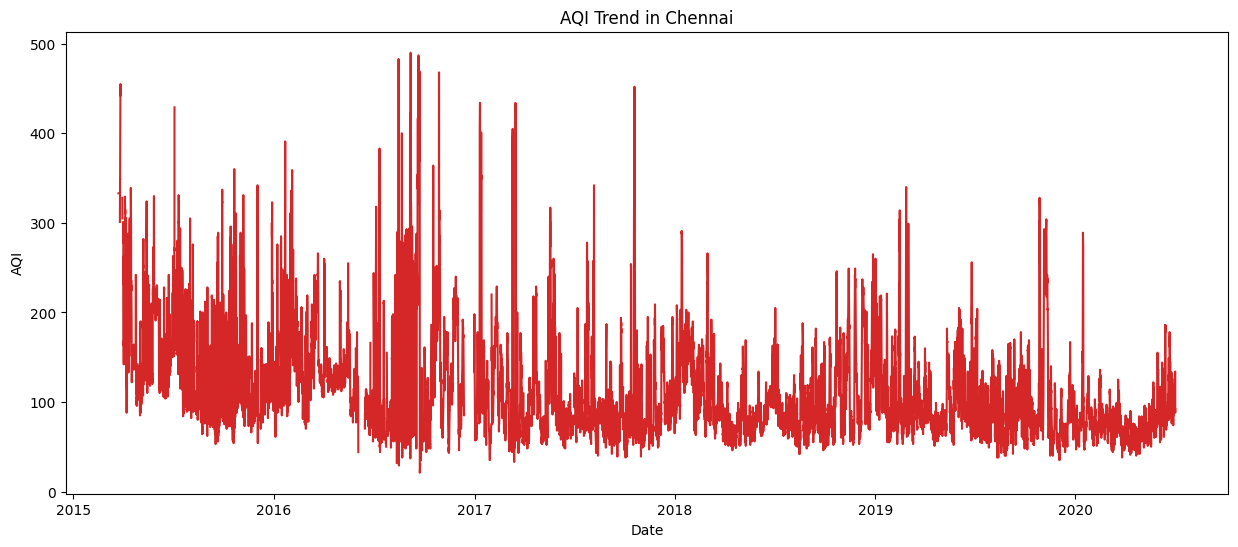

In [81]:
# 1. Visualize AQI Trend for Chennai
city_name = 'Chennai'
city_df = df[df['City'] == city_name].sort_values('Datetime')

plt.figure(figsize=(15, 6))
plt.plot(city_df['Datetime'], city_df['AQI'], color='tab:red')
plt.title(f'AQI Trend in {city_name}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.savefig('aqi_trend_Chennai.png')
plt.show()

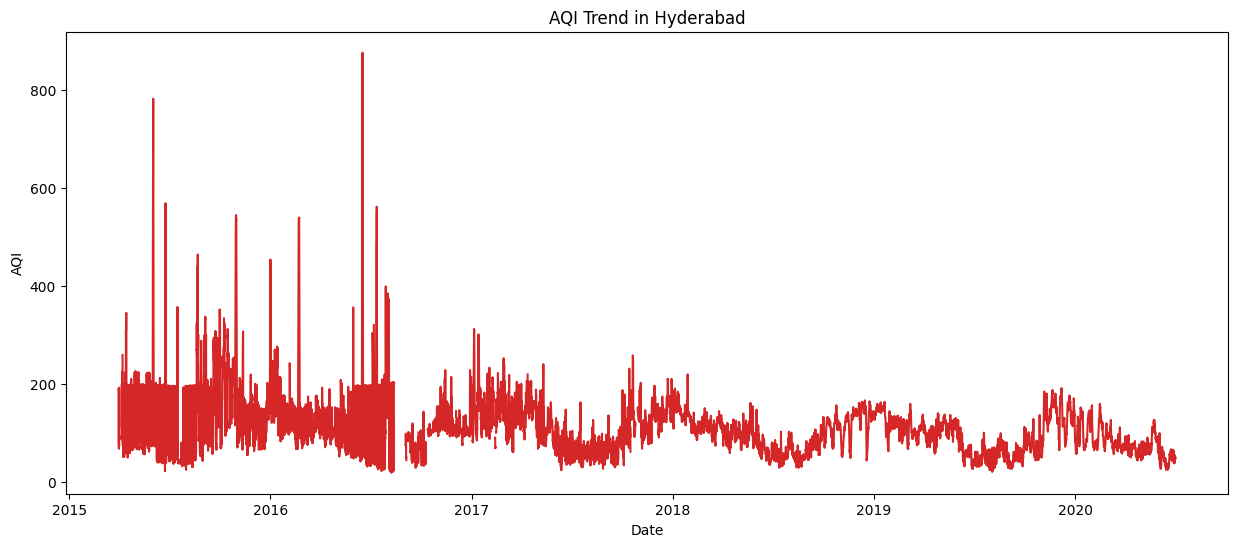

In [83]:
# 1. Visualize AQI Trend for Hyderabad
city_name = 'Hyderabad'
city_df = df[df['City'] == city_name].sort_values('Datetime')

plt.figure(figsize=(15, 6))
plt.plot(city_df['Datetime'], city_df['AQI'], color='tab:red')
plt.title(f'AQI Trend in {city_name}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.savefig('aqi_trend_Hyderabad.png')
plt.show()

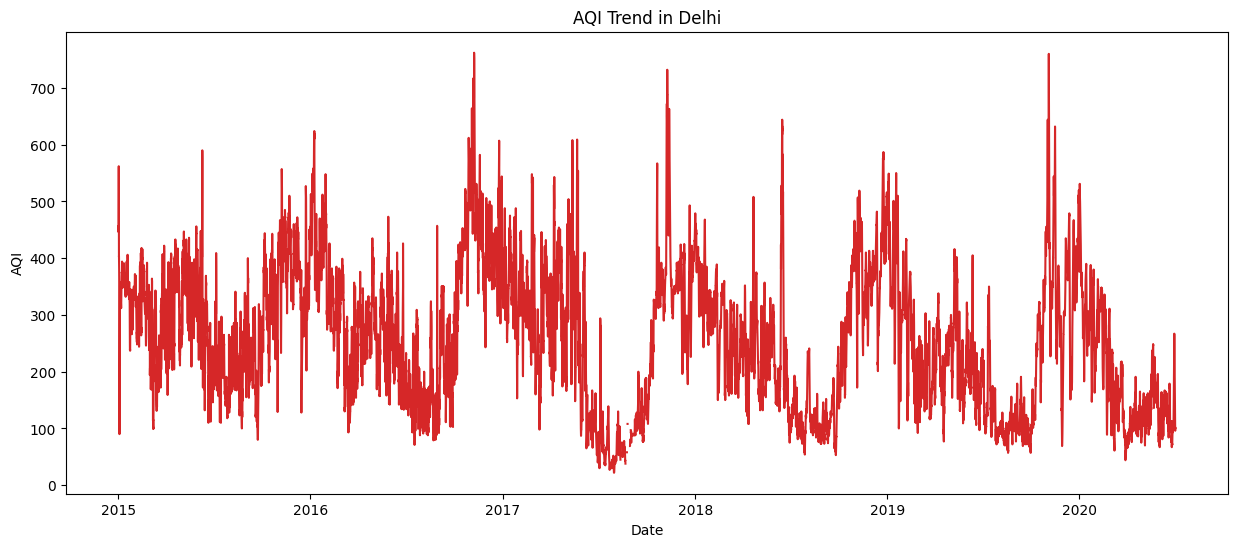

In [86]:
# 1. Visualize AQI Trend for Hyderabad
city_name = 'Delhi'
city_df = df[df['City'] == city_name].sort_values('Datetime')

plt.figure(figsize=(15, 6))
plt.plot(city_df['Datetime'], city_df['AQI'], color='tab:red')
plt.title(f'AQI Trend in {city_name}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.savefig('aqi_trend_Delhi.png')
plt.show()

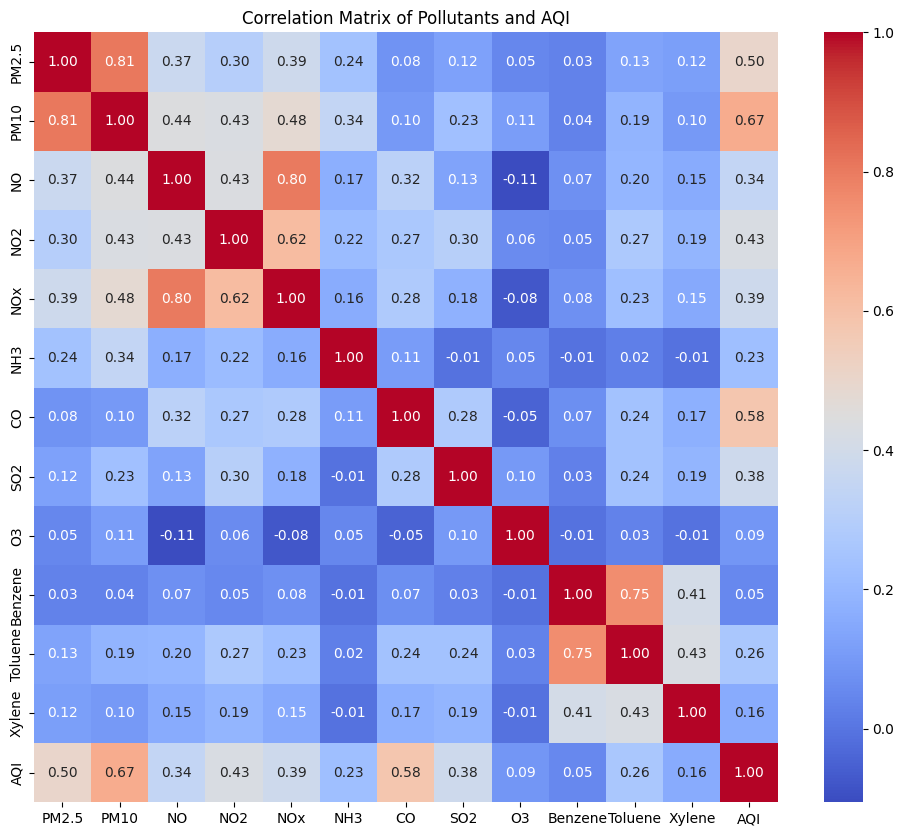

In [78]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['City', 'Datetime', 'AQI_Bucket'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants and AQI')
plt.savefig('aqi_correlation_heatmap-before feature engineering.png')
plt.show()

## Data Cleaning

In [58]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [59]:
# Define pollutant columns for cleaning
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

In [60]:
# Industry Standard: Remove physically impossible values (negatives)
df[pollutants] = df[pollutants].clip(lower=0)

In [61]:
# Process city-by-city to maintain spatial integrity
cleaned_list = []
unique_cities = df['City'].unique()

for city in unique_cities:
    city_df = df[df['City'] == city].copy()
    city_df = city_df.drop_duplicates(subset='Datetime').sort_values('Datetime')

    city_df = city_df.set_index('Datetime')
    full_hourly_range = pd.date_range(start=city_df.index.min(), end=city_df.index.max(), freq='h')
    city_df = city_df.reindex(full_hourly_range)

    city_df['City'] = city

    city_df[pollutants] = city_df[pollutants].interpolate(method='linear', limit=4)

    city_df[pollutants] = city_df[pollutants].ffill().bfill()

    city_df['AQI_Bucket'] = city_df['AQI_Bucket'].ffill().bfill()

    city_df = city_df.reset_index().rename(columns={'index': 'Datetime'})
    cleaned_list.append(city_df)

In [62]:
# Recombine into a master cleaned dataset
df_cleaned = pd.concat(cleaned_list, ignore_index=True)

In [63]:
# Final step: Remove rows where AQI is still NaN
# (Occurs if a city had zero recorded AQI values throughout its history)
df_cleaned = df_cleaned.dropna(subset=['AQI'])

In [64]:
print("Cleaned Dataset Shape:", df_cleaned.shape)

Cleaned Dataset Shape: (707875, 16)


In [65]:
df_cleaned

,Datetime,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,2015-01-01 01:00:00,Ahmedabad,36.60,120.06,1.00,40.01,36.37,NaN,1.00,122.070,153.580,0.0,0.0,0.0,288.0,Poor
1,2015-01-01 02:00:00,Ahmedabad,36.60,120.06,0.02,27.75,19.73,NaN,0.02,85.900,153.580,0.0,0.0,0.0,288.0,Poor
2,2015-01-01 03:00:00,Ahmedabad,36.60,120.06,0.08,19.32,11.08,NaN,0.08,52.830,153.580,0.0,0.0,0.0,288.0,Poor
3,2015-01-01 04:00:00,Ahmedabad,36.60,120.06,0.30,16.45,9.20,NaN,0.30,39.530,153.580,0.0,0.0,0.0,288.0,Poor
4,2015-01-01 05:00:00,Ahmedabad,36.60,120.06,0.12,14.90,7.85,NaN,0.12,32.630,108.915,0.0,0.0,0.0,288.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,2020-06-30 20:00:00,Visakhapatnam,9.50,36.00,2.75,25.57,15.85,4.57,0.62,1.935,27.750,0.0,0.0,0.0,51.0,Satisfactory
707871,2020-06-30 21:00:00,Visakhapatnam,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.020,25.580,0.0,0.0,0.0,51.0,Satisfactory
707872,2020-06-30 22:00:00,Visakhapatnam,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.770,26.150,0.0,0.0,0.0,50.0,Good
707873,2020-06-30 23:00:00,Visakhapatnam,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.750,15.820,0.0,0.0,0.0,50.0,Good


## Time Series Feature Engineering

In [66]:
#1. Cyclical Time Encoding
df_cleaned['Hour'] = df_cleaned['Datetime'].dt.hour
df_cleaned['Month'] = df_cleaned['Datetime'].dt.month

df_cleaned['Hour_sin'] = np.sin(2 * np.pi * df_cleaned['Hour'] / 24)
df_cleaned['Hour_cos'] = np.cos(2 * np.pi * df_cleaned['Hour'] / 24)
df_cleaned['Month_sin'] = np.sin(2 * np.pi * df_cleaned['Month'] / 12)
df_cleaned['Month_cos'] = np.cos(2 * np.pi * df_cleaned['Month'] / 12)

In [67]:
# We group by City to ensure windows don't overlap across different cities
df_cleaned = df_cleaned.sort_values(['City', 'Datetime'])

In [68]:
# Daily Trend and Volatility for PM2.5
df_cleaned['PM2.5_24h_Mean'] = df_cleaned.groupby('City')['PM2.5'].transform(lambda x: x.rolling(window=24).mean())
df_cleaned['PM2.5_24h_Std'] = df_cleaned.groupby('City')['PM2.5'].transform(lambda x: x.rolling(window=24).std())

In [69]:
# Daily Trend for NO2
df_cleaned['NO2_24h_Mean'] = df_cleaned.groupby('City')['NO2'].transform(lambda x: x.rolling(window=24).mean())

In [70]:
# --- 3. Lag Features
# t-1 (previous hour), t-6 (quarter day), t-24 (same time yesterday)
df_cleaned['PM2.5_Lag_1h'] = df_cleaned.groupby('City')['PM2.5'].shift(1)
df_cleaned['PM2.5_Lag_6h'] = df_cleaned.groupby('City')['PM2.5'].shift(6)
df_cleaned['PM2.5_Lag_24h'] = df_cleaned.groupby('City')['PM2.5'].shift(24)

In [71]:
# --- 4. Differencing (Stationarity) ---
# Captures the "rate of change" in pollution
df_cleaned['PM2.5_Diff_1h'] = df_cleaned.groupby('City')['PM2.5'].diff(1)

In [74]:
# Drop rows where rolling/lag results are NaN (first 24h of each city's data)
df_engineered = df_cleaned.dropna()

In [75]:
print(f"Number of features after engineering: {len(df_engineered.columns)}")

Number of features after engineering: 29


In [76]:
df_engineered

,Datetime,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Hour_cos,Month_sin,Month_cos,PM2.5_24h_Mean,PM2.5_24h_Std,NO2_24h_Mean,PM2.5_Lag_1h,PM2.5_Lag_6h,PM2.5_Lag_24h,PM2.5_Diff_1h
50896,2017-11-25 17:00:00,Amaravati,72.75,120.25,1.50,26.72,15.45,10.78,0.10,16.030,...,-2.588190e-01,-5.000000e-01,0.866025,77.906250,9.425282,20.029167,70.00,82.75,60.50,2.75
50897,2017-11-25 18:00:00,Amaravati,81.50,134.75,1.10,18.78,10.88,14.73,0.10,12.930,...,-1.836970e-16,-5.000000e-01,0.866025,78.572917,9.068723,19.803333,72.75,79.00,65.50,8.75
50898,2017-11-25 19:00:00,Amaravati,85.00,142.50,1.62,26.20,15.27,14.50,0.20,12.900,...,2.588190e-01,-5.000000e-01,0.866025,78.781250,9.159906,19.845833,81.50,73.75,80.00,3.50
50899,2017-11-25 20:00:00,Amaravati,91.50,145.75,0.98,18.88,10.83,14.12,0.20,15.220,...,5.000000e-01,-5.000000e-01,0.866025,79.197917,9.509714,19.955417,85.00,68.50,81.50,6.50
50900,2017-11-25 21:00:00,Amaravati,92.50,131.25,0.55,21.35,11.80,12.23,0.10,17.450,...,7.071068e-01,-5.000000e-01,0.866025,79.916667,9.844350,20.116667,91.50,69.25,75.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,2020-06-30 20:00:00,Visakhapatnam,9.50,36.00,2.75,25.57,15.85,4.57,0.62,1.935,...,5.000000e-01,1.224647e-16,-1.000000,16.156250,9.620464,27.500000,8.25,10.75,11.75,1.25
707871,2020-06-30 21:00:00,Visakhapatnam,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.020,...,7.071068e-01,1.224647e-16,-1.000000,16.218750,9.622582,28.085417,9.50,15.75,15.75,7.75
707872,2020-06-30 22:00:00,Visakhapatnam,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.770,...,8.660254e-01,1.224647e-16,-1.000000,16.895833,10.420485,28.699167,17.25,14.00,19.75,18.75
707873,2020-06-30 23:00:00,Visakhapatnam,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.750,...,9.659258e-01,1.224647e-16,-1.000000,16.635417,10.365332,29.263750,36.00,9.75,22.00,-20.25


In [46]:
df_engineered.columns

Index(['Datetime', 'City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'Hour', 'Month', 'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos',
       'PM2.5_Rolling_Mean_24h', 'PM2.5_Rolling_Std_24h', 'PM2.5_Lag_1h',
       'PM2.5_Lag_24h', 'PM2.5_Lag_6h', 'PM_Ratio', 'PM2.5_24h_Mean',
       'PM2.5_24h_Std', 'NO2_24h_Mean', 'PM2.5_Diff_1h'],
      dtype='object')

/tmp/ipython-input-1026642376.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='magma')


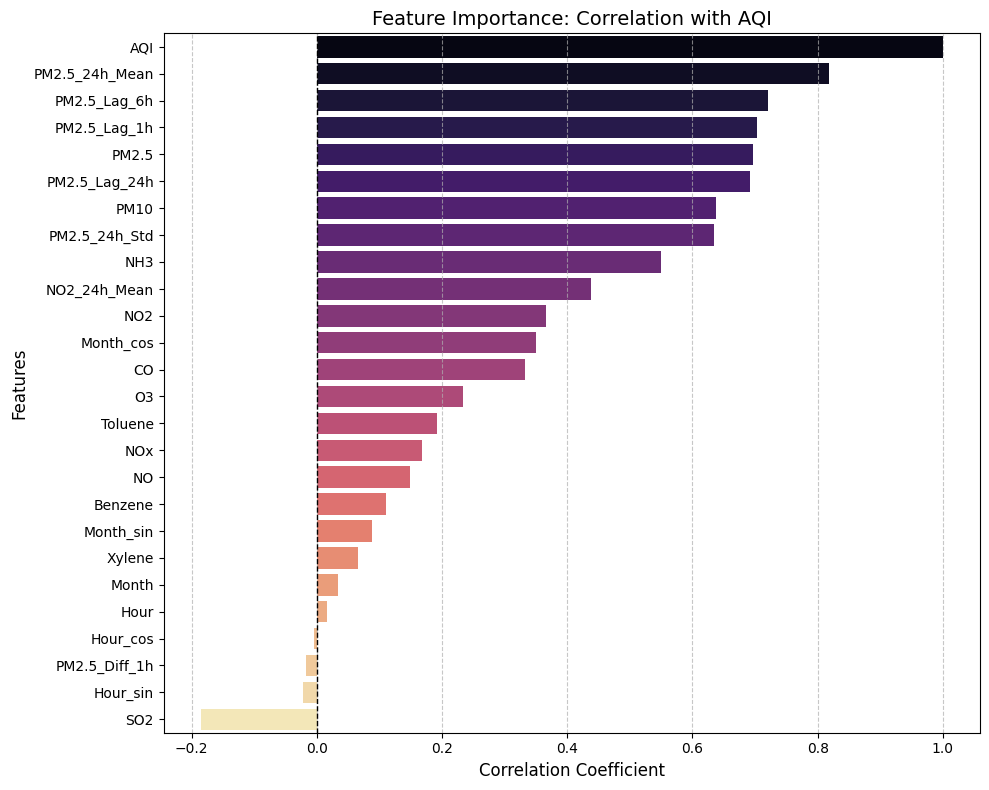

Top 5 Predictive Features:
AQI               1.000000
PM2.5_24h_Mean    0.818483
PM2.5_Lag_6h      0.720885
PM2.5_Lag_1h      0.702515
PM2.5             0.696054
PM2.5_Lag_24h     0.691600
Name: AQI, dtype: float64


In [49]:
target = 'AQI'
features = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene',
    'Hour', 'Month', 'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos',
    'PM2.5_24h_Mean', 'PM2.5_24h_Std', 'NO2_24h_Mean',
    'PM2.5_Lag_1h', 'PM2.5_Lag_6h', 'PM2.5_Lag_24h',
    'PM2.5_Diff_1h'
]
correlations = df_engineered[features + [target]].corr()[target].sort_values(ascending=False)

# Visualize the importance
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='magma')

plt.title('Feature Importance: Correlation with AQI', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('Feature Importance: Correlation with AQI.png')
plt.show()

print("Top 5 Predictive Features:")
print(correlations.head(6))

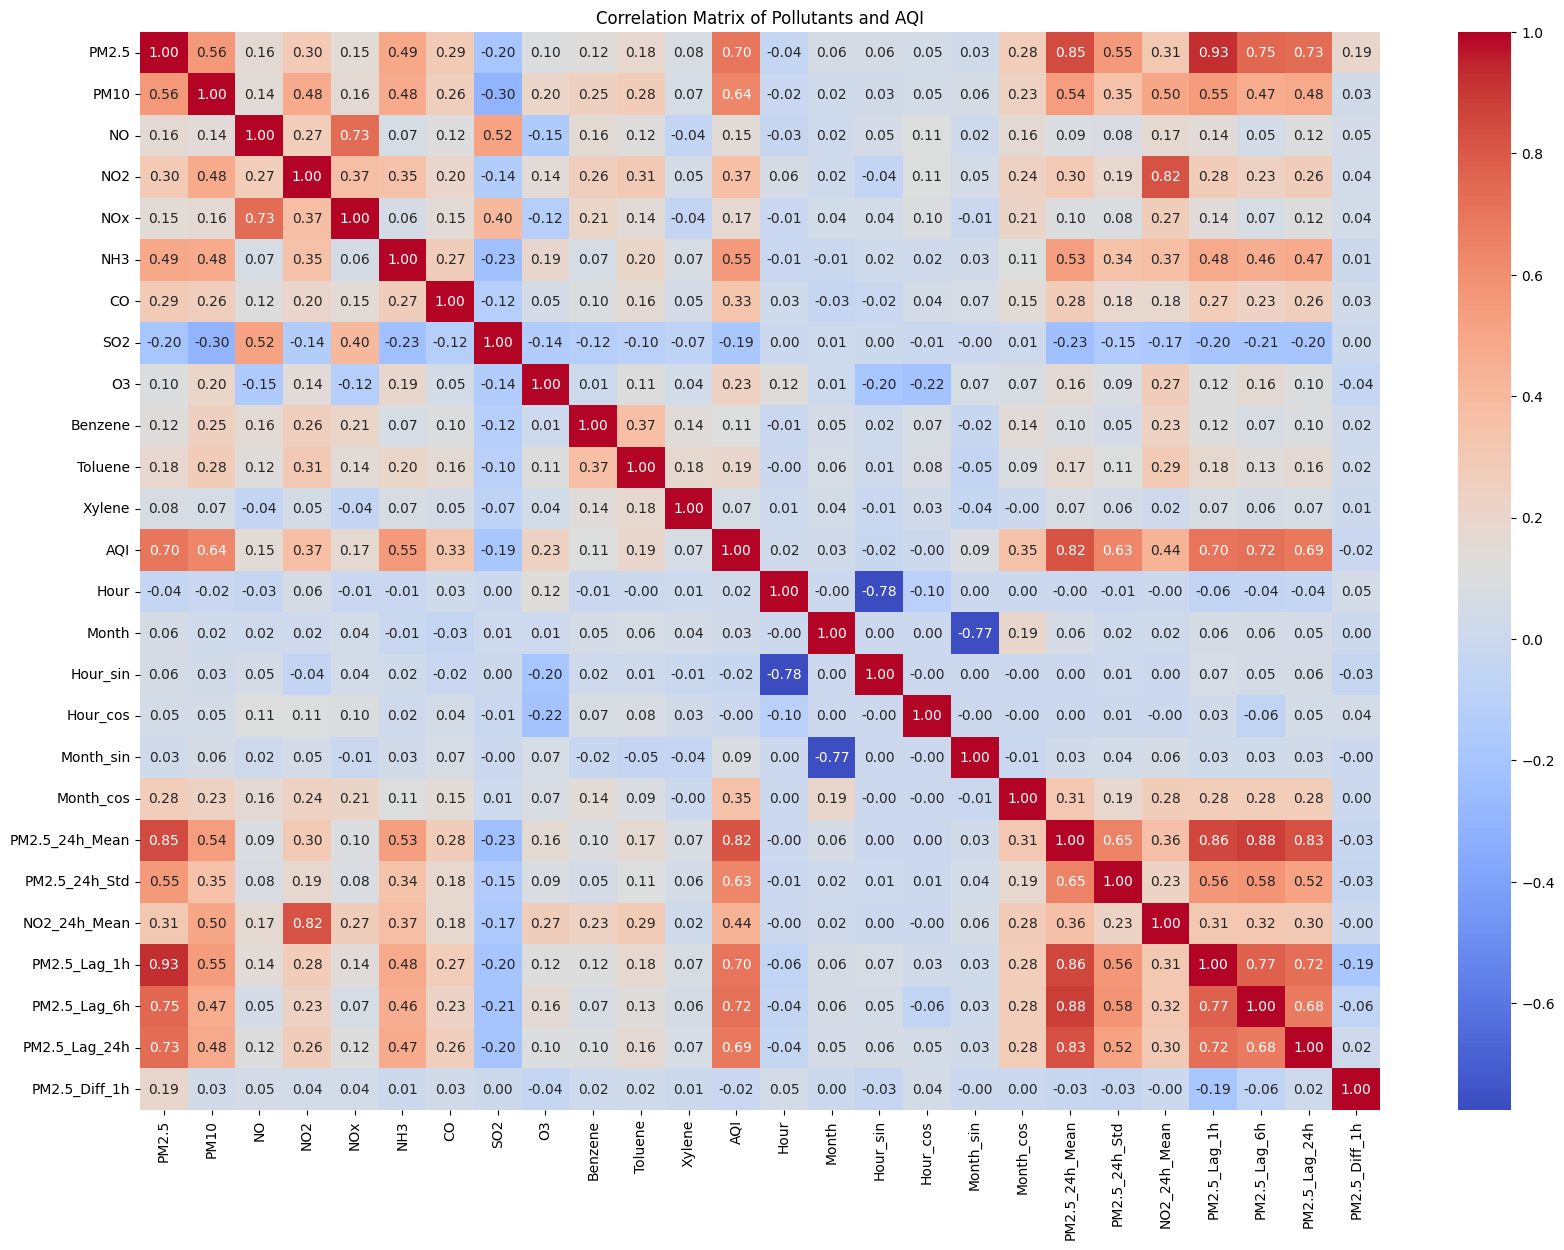

In [80]:
# 2. Correlation Heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(df_engineered.drop(['City', 'Datetime', 'AQI_Bucket'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants and AQI')
plt.savefig('aqi_correlation_heatmap-after feature engineering.png')
plt.show()

## Scaling and Processing for Seq2One